In [8]:
import cv2
import numpy as np

# Load image
img = cv2.imread('tape.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding to binarize (can also try Canny)
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Optional: Resize or crop to focus
# binary = cv2.resize(binary, (500, 500))


In [9]:
# Remove small noise
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Contours can be extracted if needed
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [10]:
grid = cv2.resize(cleaned, (100, 100))
grid = grid // 255  # Now 0 (free) or 1 (occupied)


In [11]:
np.save("environment_map.npy", grid)


In [12]:
import numpy as np
import matplotlib.pyplot as plt


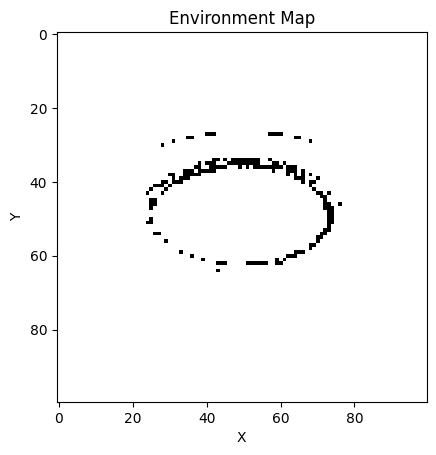

In [13]:
occupancy_map = np.load('environment_map.npy')  # or whatever file you're using

plt.imshow(occupancy_map, cmap='Greys')  # black = obstacle, white = free
plt.title("Environment Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()